<font size=48>Machine Learning</font><br>

## Lab04 - K-Means Clustering (Unsupervised Learning)

Objectives:
- Learn how to use the scikit-learn's K-Means package.
- Learn how to implement our own K-Means class.

Material adapted from https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42 but I added and modifed quite a bit to it.

Version: 2024-11-19

This lab is by YP Wong [<yp@ypwong.net>](mailto:yp@ypwong.net).


## Import Libraries

In [5]:
#import libraries
import numpy as np
import pandas as pd
import random as rd

import matplotlib.pyplot as plt
%matplotlib inline

## Experiment scikit-learn's K-means Package Using Generated Blobs Data


In [7]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def get_sample_blobs_data():
  features, true_labels = make_blobs(
      n_samples = 200,
      centers = 3,
      cluster_std = 2.75,
      random_state = 42
  )

  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(features)
  # print(type(scaled_features))
  # print(scaled_features.shape)
  return scaled_features


In [8]:
X = get_sample_blobs_data()

kmeans = KMeans(
    init = "k-means++",   # another option is "random"
    n_clusters = 3,
    n_init = "auto",
    max_iter = 100,
    random_state = 42
)

kmeans.fit(X)

print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)
print(kmeans.labels_)

74.57960106819854
[[ 1.19539276  0.13158148]
 [-0.91941183 -1.18551732]
 [-0.25813925  1.05589975]]
6
[0 2 1 1 1 1 2 1 0 1 0 0 0 0 2 1 2 1 0 1 0 0 1 2 1 2 2 1 2 0 0 0 1 1 2 2 1
 2 1 2 0 2 1 0 1 0 0 1 0 2 1 2 1 2 2 2 1 0 2 0 1 2 1 1 1 1 2 2 1 2 2 1 2 0
 0 0 0 2 0 2 2 0 1 1 1 1 1 2 0 1 0 2 2 2 0 1 2 0 0 2 1 1 2 1 2 0 1 0 0 1 0
 0 2 1 2 1 1 2 2 2 1 0 2 1 1 0 2 2 0 2 0 1 2 1 1 0 0 0 2 0 2 2 1 0 0 2 0 1
 1 0 2 1 0 1 0 1 1 2 0 0 2 0 0 1 2 0 0 2 1 0 1 2 0 1 2 0 2 2 2 0 2 0 1 1 1
 2 0 0 0 2 2 0 1 1 2 1 2 2 0 0]


### Find Optimum Number of Clusters Using Elbow Method

The idea is that we want a small within-cluster sums of squares (WCSS), but that the WCSS tends to decrease toward 0 as we increase k (the WCSS is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low WCSS, and the elbow usually represents where we start to have diminishing returns by increasing k.

To identify the elbow point programmatically:  

- kneed: https://github.com/arvkevi/kneed

In [11]:
!pip install kneed
from kneed import KneeLocator

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualising the clusters
default_colors = ["red", "green", "blue", "cyan", "magenta",
          "purple", "beige", "brown", "pink", "orange",
          "yellow", "gray", "black"]

def plot_inertia(WCSS_array, k_max,
                 x_label = "Number of Clusters",
                 y_label = "Within-Cluster Sums of Squares (WCSS)",
                 title = "Elbow Method to Determine Optimum Number of Clusters"
                ):
  k = WCSS_array.size
  K_array = np.arange(1, k_max + 1, 1)
  plt.xlim(1, k_max)
  plt.plot(K_array[:k], WCSS_array)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)


def get_elbow(WCSS_array, k_max):
  K_array = np.arange(1, k_max + 1, 1)
  kl = KneeLocator(K_array, WCSS_array, S = 1.0,
                   curve = "convex", direction = "decreasing")
  return kl.elbow

def plot_clusters(n_clusters, centroids, X, labels,
                  title, x_label, y_label,
                  colors = default_colors):
  for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1],
                s = 20, c = colors[i], label = f"Cluster {i+1}")

  plt.scatter(centroids[:, 0], centroids[:, 1],
                s = 40, c = 'yellow', marker = 's', label = 'Centroids')

  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend(fontsize = "xx-small")


In [13]:
def get_inertia_list(X, k_min, k_max, KMeans_model,
                     title, x_label, y_label,
                     visualize = False):

  # WCSS_array = np.array([])   # also works
  WCSS_array = []   # Within-Cluster Sum of Square i.e. Inertia

  if visualize:
    figure = plt.figure(figsize=(12, 30))

  for k in range(k_min, k_max + 1):

    kmeans = KMeans_model(
        init = "k-means++",   # another option is "random"
        n_clusters = k,
        n_init = "auto",
        max_iter = 100,
        random_state = 42
    )

    kmeans.fit(X)
    labels = kmeans.predict(X)
    WCSS_array = np.append(WCSS_array, kmeans.inertia_)

    if visualize:
      figure.add_subplot((k_max - 1) // 2 + 1, 2, k - k_min + 1)
      plot_clusters(k, kmeans.cluster_centers_, X, labels,
                    title + f" (k = {k})",
                    x_label, y_label,
                    colors = default_colors)

  return WCSS_array

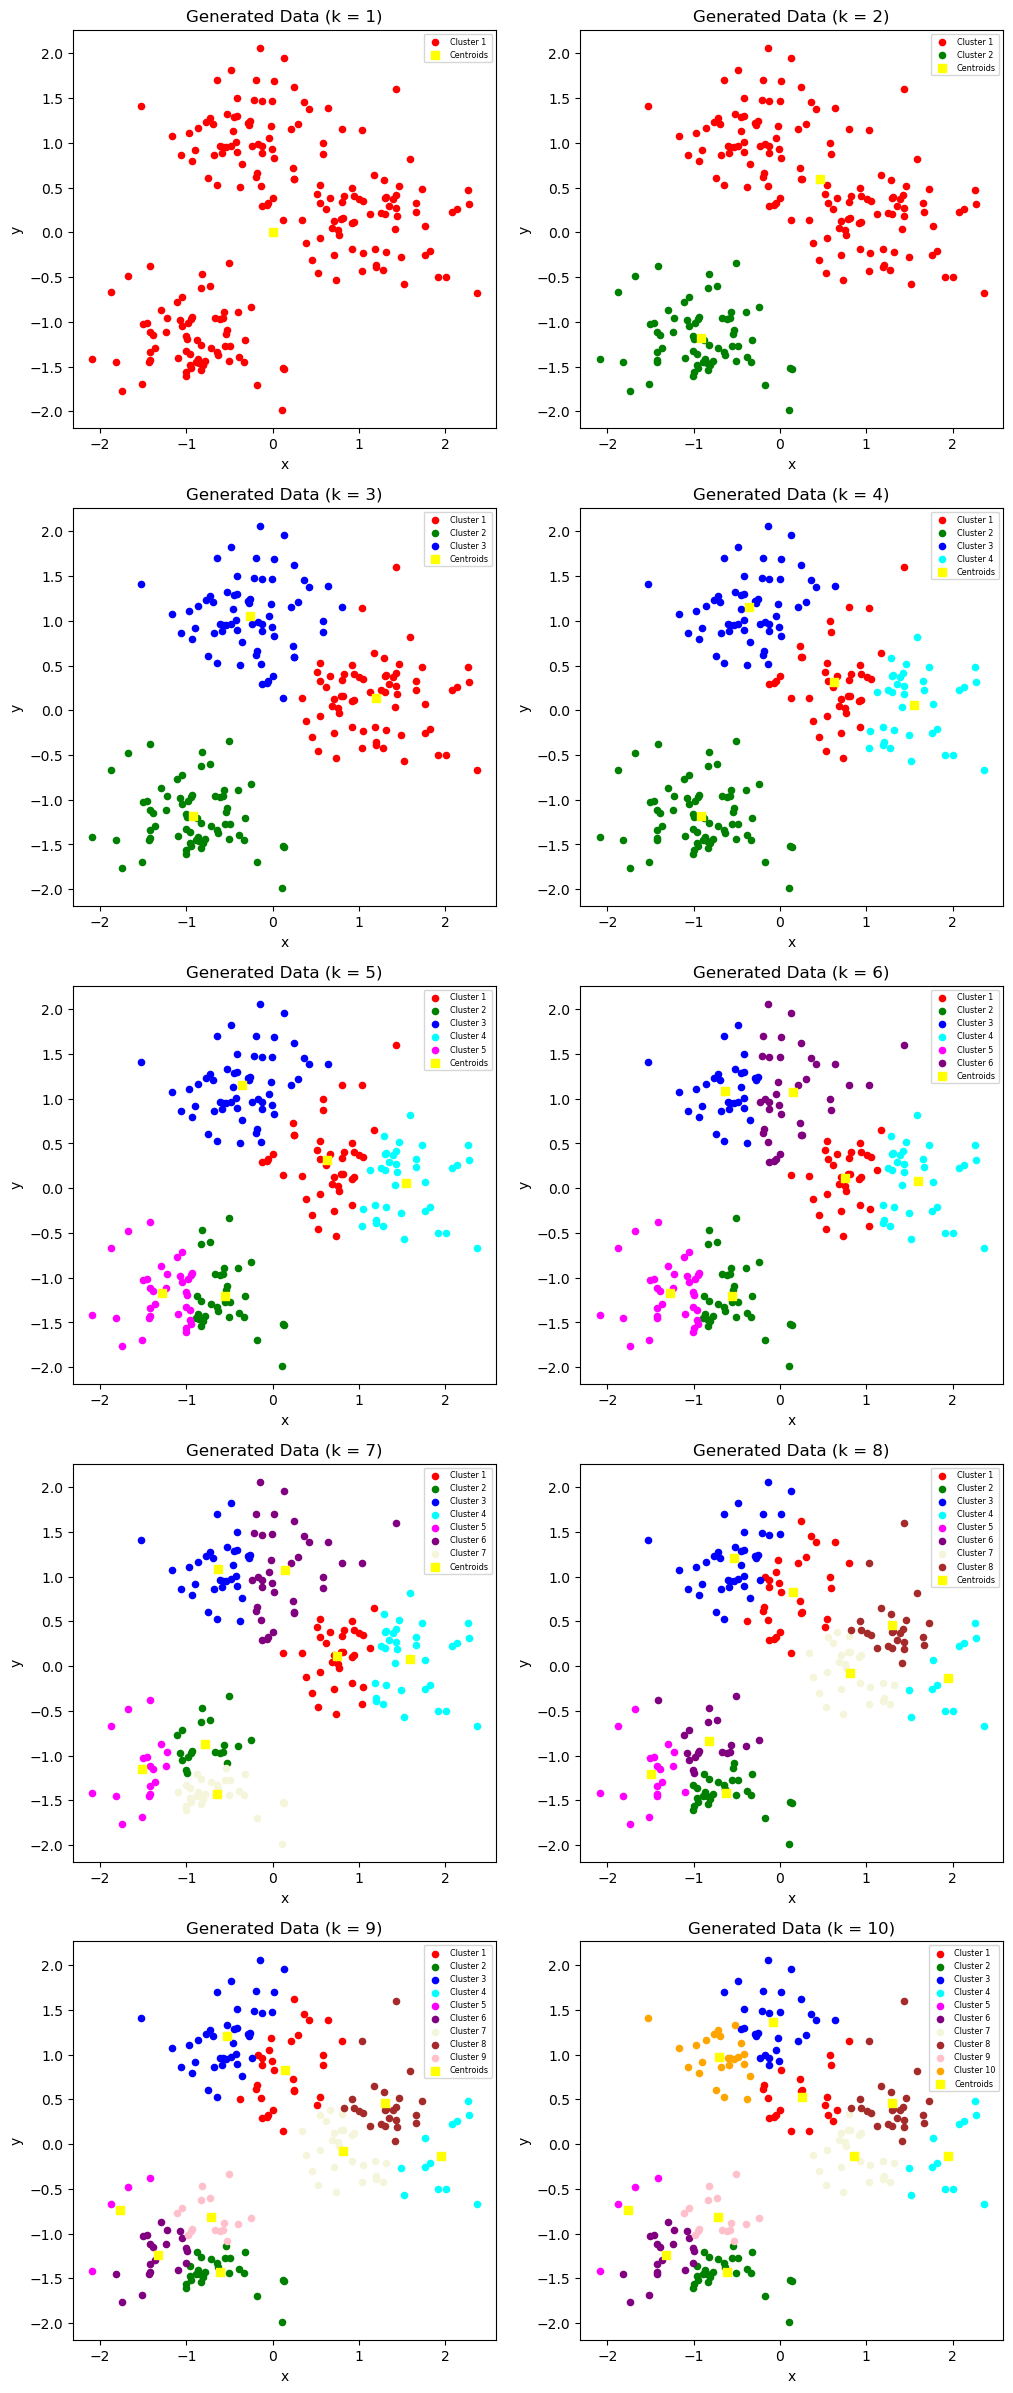

In [14]:
WCSS_array = get_inertia_list(X, k_min = 1, k_max = 10, KMeans_model = KMeans,
                              title = "Generated Data",
                              x_label = "x", y_label = "y",
                              visualize = True)

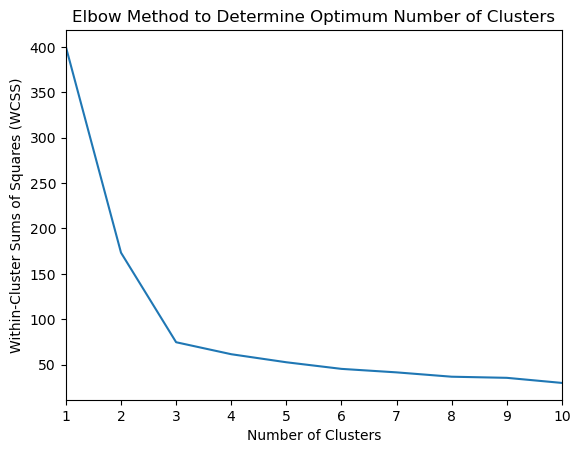

In [15]:
plot_inertia(WCSS_array, k_max = 10)
plt.show()

n_clusters = elbow = 3


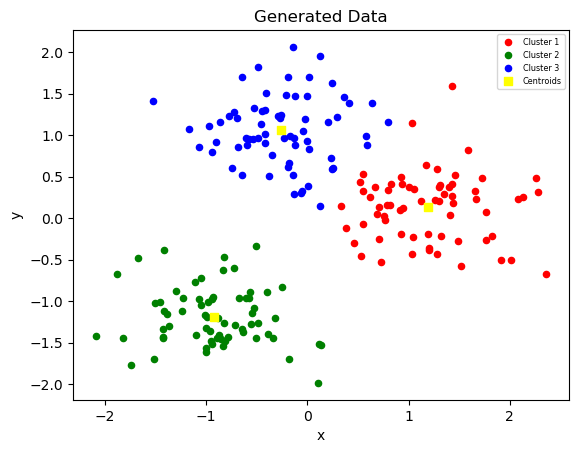

In [16]:
n_clusters = get_elbow(WCSS_array, k_max = 10)
print("n_clusters = elbow =", n_clusters)

kmeans = KMeans(
    init = "k-means++",   # another option is "random"
    n_clusters = n_clusters,
    n_init = "auto",
    max_iter = 100,
    random_state = 42
)

kmeans.fit(X)
labels = kmeans.predict(X)

plot_clusters(n_clusters, kmeans.cluster_centers_, X, labels,
              title = "Generated Data",
              x_label = "x", y_label = "y",
              colors = default_colors)
plt.show()

### Test the Model

In [18]:
sample_test = np.array([[1, 0.5], [-1, -1.5]])
print(sample_test)
print(sample_test.shape)

labels = kmeans.predict(sample_test)
print(labels)

[[ 1.   0.5]
 [-1.  -1.5]]
(2, 2)
[0 1]


## Experiment scikit-learn's K-means package Using Real-World Data
### Read the Data

Data source: https://www.superdatascience.com/

In [29]:
import pandas as pd

In [31]:
dataset = pd.read_csv('Mall_Customers.csv')

In [33]:
print(type(dataset))
print(dataset.shape)

dataset.describe()

<class 'pandas.core.frame.DataFrame'>
(200, 5)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
X = dataset.iloc[:, [3, 4]].values  # all rows, column 3 and 4
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(200, 2)


In [37]:
m = X.shape[0]  # number of training examples (number of rows)
n = X.shape[1]  # number of features (number of columns)

print(m)
print(n)

n_clusters = 5    # number of clusters

200
2


### Find Optimum Number of Clusters Using Elbow Method

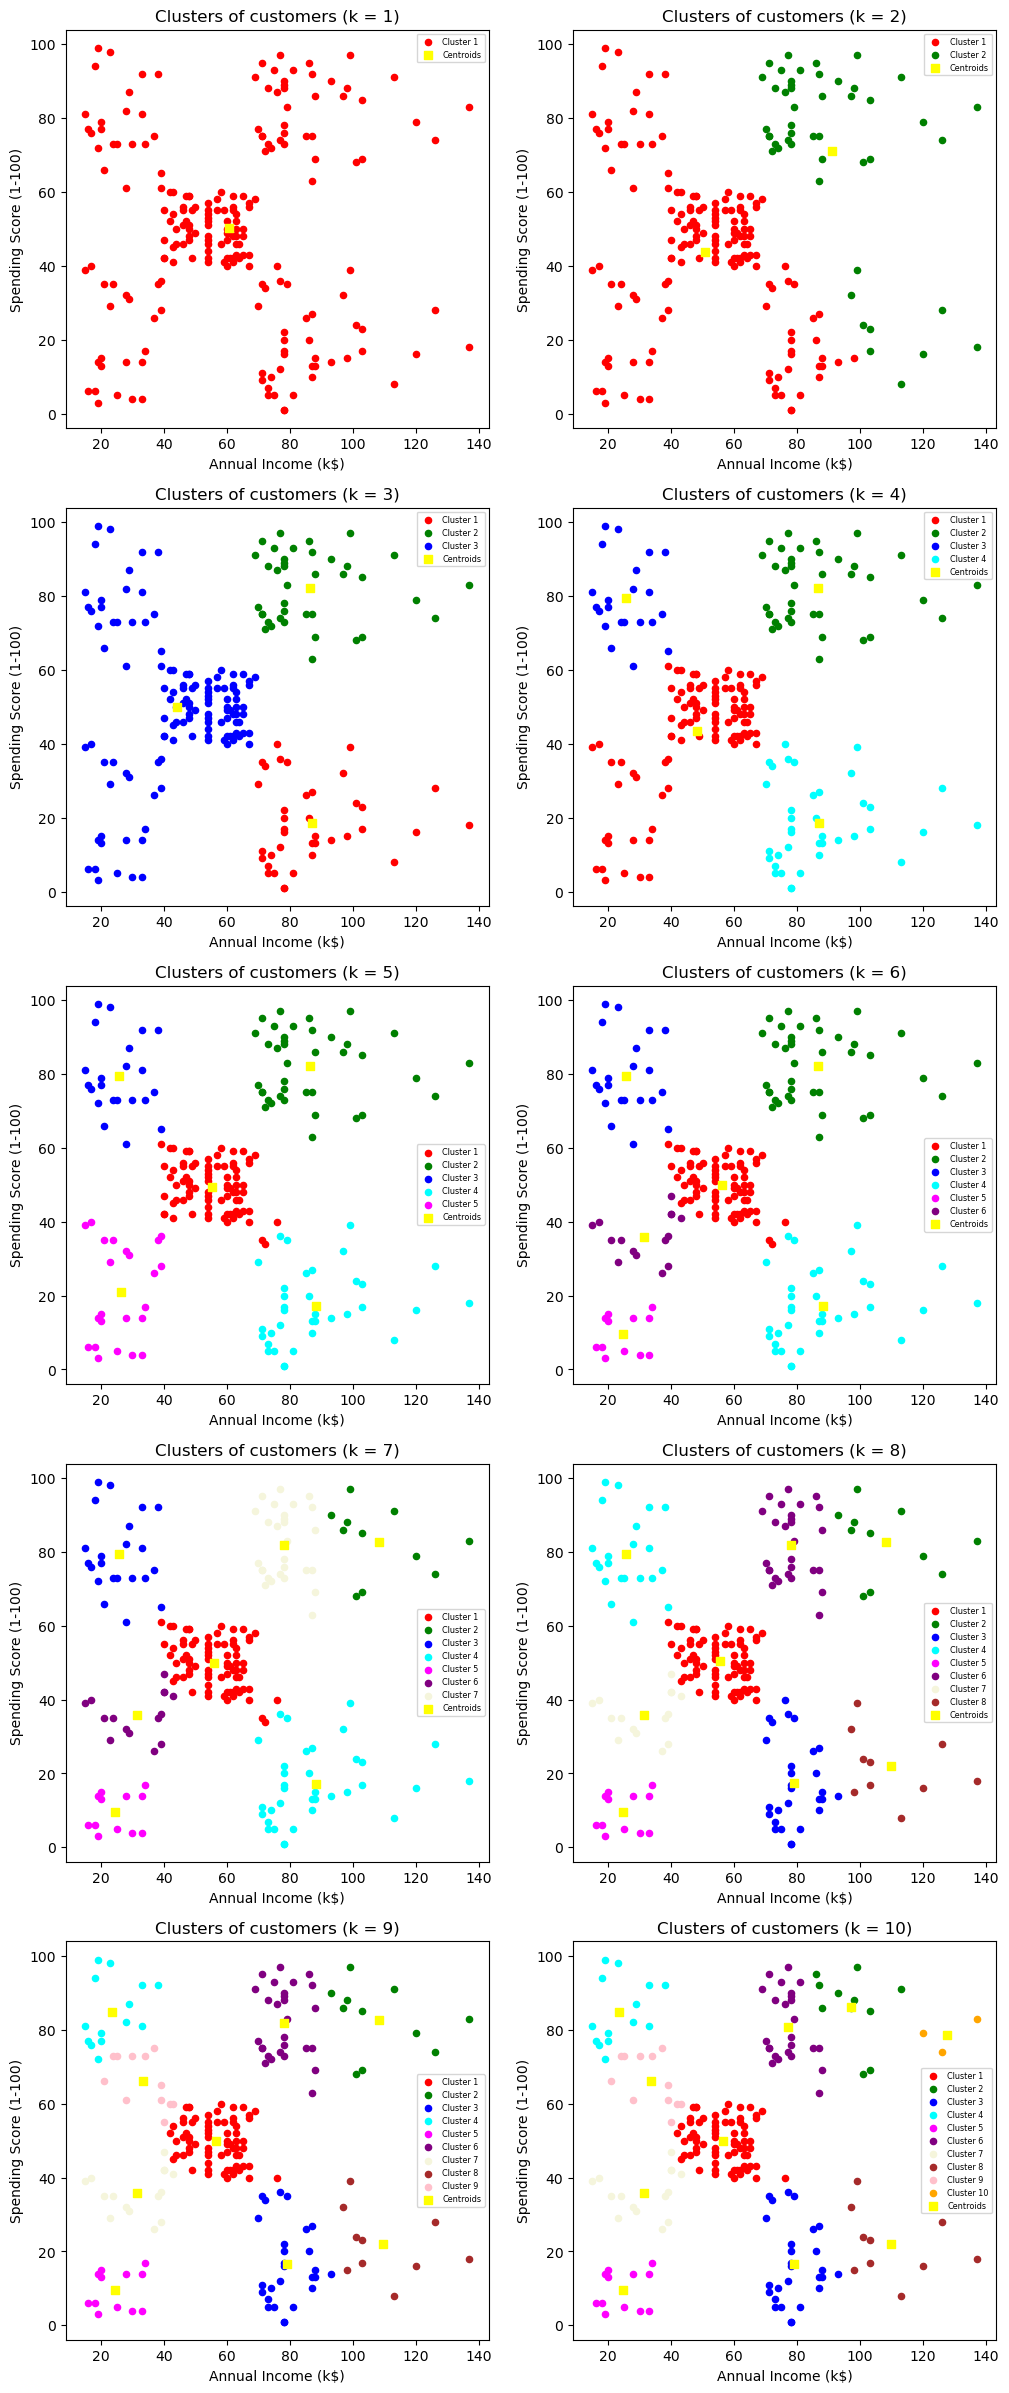

In [40]:
WCSS_array = get_inertia_list(X, k_min = 1, k_max = 10, KMeans_model = KMeans,
                              title = "Clusters of customers",
                              x_label = "Annual Income (k$)",
                              y_label = "Spending Score (1-100)",
                              visualize = True)

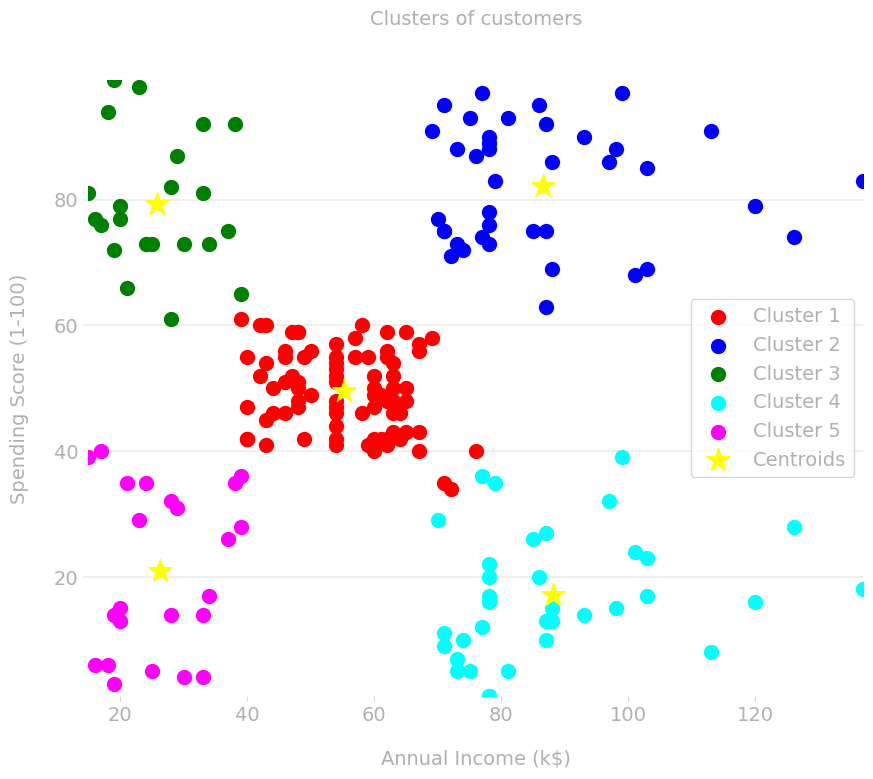

In [123]:
# Assume relevant features are 'Annual Income (k$)' and 'Spending Score (1-100)'
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Clustering with K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

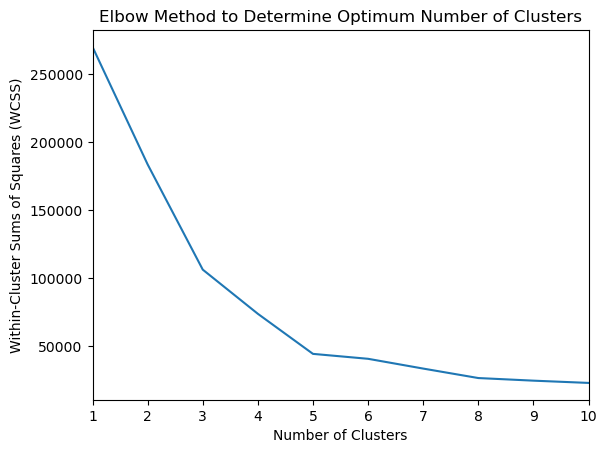

In [41]:
plot_inertia(WCSS_array, k_max = 10)
plt.show()

n_clusters = elbow = 5


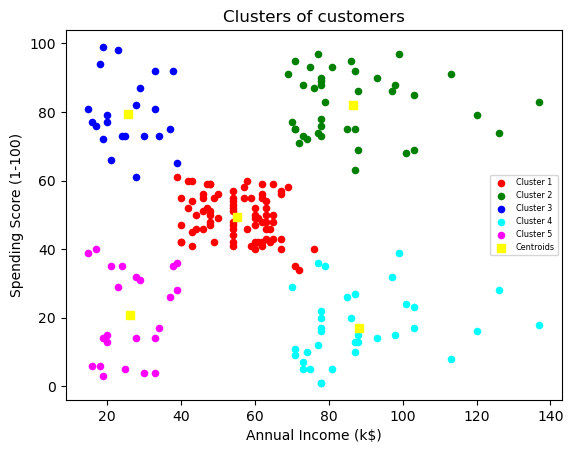

In [42]:
n_clusters = get_elbow(WCSS_array, k_max = 10)
print("n_clusters = elbow =", n_clusters)

kmeans = KMeans(
    init = "k-means++",   # another option is "random"
    n_clusters = n_clusters,
    n_init = "auto",
    max_iter = 100,
    random_state = 42
)

kmeans.fit(X)
labels = kmeans.predict(X)

plot_clusters(n_clusters, kmeans.cluster_centers_, X, labels,
              title = "Clusters of customers",
              x_label = "Annual Income (k$)",
              y_label = "Spending Score (1-100)",
              colors = default_colors)
plt.show()

### Test the Model

In [47]:
sample_test = np.array([[70, 60], [100, 60]])
print(sample_test)
print(sample_test.shape)

labels = kmeans.predict(sample_test)
print(labels)

[[ 70  60]
 [100  60]]
(2, 2)
[0 1]


## Implement Our Own K-means Class From Scratch

In [50]:
import numpy as np
import random as rd

class MyKMeans:

  def __init__(self,
               n_clusters = 8,
               max_iter = 300,
               init = "ramdom",
               tol = 1e-4,
               random_state = None,
               n_init = "auto"):

    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.init = init
    self.tol = tol
    self.random_state = random_state
    if n_init == "auto":
      self.n_init = 1
    else:
      self.n_init = n_init

  # randomly initialize the centroids
  def __init_centroids_random(X, n_clusters, random_state = None):

    if random_state != None:
      rd.seed(random_state)

    n_points = X.shape[0]

    # centroids = np.array([]).reshape(0, 2)   # also works
    centroids = np.empty( (0, 2), dtype = float )
    for i in range(n_clusters):
      rand = rd.randint(0, n_points - 1)
      centroids = np.append(centroids, [X[rand]], axis = 0)  # add another centroid

    return centroids

  # initialize the centroids using K-Means++ method
  def __init_centroids_kmeanspp(X, n_clusters, random_state = None):

    if random_state != None:
      rd.seed(random_state)

    n_points = X.shape[0]

    rand = rd.randint(0, n_points - 1)
    centroids = np.array([X[rand]])  # start with 1 random centroid

    # start with 1 centroid,
    #   each iteration adds one more centroid to list centroids
    for k in range(1, n_clusters):

      # dists = np.array([])   # also works
      dists = []
      # For each point, compute the distance to
      #   the nearest centroid amoung the k centroids so far
      for x in [x for x in X if x not in centroids]:
        dist_to_centroids = np.sum((x - centroids) ** 2)
        dists = np.append(dists, np.min(dist_to_centroids))

      probs = dists / np.sum(dists)
      cummulative_probs = np.cumsum(probs)

      # Randomly select a point as centroid
      #   with probability proportion to the distance
      #   of that point to the nearest so-far-selected centroid.
      #   Meaning, we want to select the next centroid
      #   to be as far as possible to the rest of the selected centroids
      rand = rd.random()
      i = 0
      for j, prob in enumerate(cummulative_probs):
        if prob >= rand:
          i = j
          break

      centroids = np.append(centroids, [X[i]], axis = 0)  # add another centroid

    return centroids

  def init_centroids(X, n_clusters, random_state, init = "random"):
    if init == "k-means++":
      centroids = MyKMeans.__init_centroids_kmeanspp(X, n_clusters, random_state)
    else:
      centroids = MyKMeans.__init_centroids_random(X, n_clusters, random_state)

    return centroids

  def assign_labels(X, centroids):

    n_points = X.shape[0]
    n_clusters = centroids.shape[0]

    dists = np.zeros( (n_points, n_clusters) )

    for k in range(n_clusters):
      centroid = centroids[k, :]
      dists[:, k] = np.sum( (X - centroid)**2, axis = 1 )
    labels = np.argmin(dists, axis = 1)

    return labels

  def initialize(self, X):

    self.cluster_centers_ = MyKMeans.init_centroids(X,
                                                    self.n_clusters,
                                                    self.random_state,
                                                    self.init)

    self.labels_ = MyKMeans.assign_labels(X, self.cluster_centers_)

    return self

  def recompute_centroids(self, X):

    n_points = X.shape[0]

    # Adjust the centroids

    # For k = 1, ..., n_clusters,
    #   initialize empty list Y[k] for cluster k,
    #   to store points for cluster k
    Y = {}
    for k in range(self.n_clusters):
      # Y[k] = np.array([]).reshape(0, X.shape[1])   # also works
      Y[k] = np.empty( (0, X.shape[1]), dtype = float )

    # For each point, if the label is k then,
    #   add the point to the list of points Y[k]
    for i in range(n_points):
      k = self.labels_[i]
      Y[k] = np.append(Y[k], X[i].reshape(1,-1), axis = 0)

    # for k in range(self.n_clusters):
    #   print(f"size Y{k} =" + str(Y[k].size))

    # Compute the new centroid for each cluster
    for k in range(self.n_clusters):
      self.cluster_centers_[k, :] = np.mean(Y[k], axis = 0)

    # Within-Cluster Sum of Square
    wcss = 0
    for k in range(self.n_clusters):
      wcss += np.sum((Y[k] - self.cluster_centers_[k, :]) ** 2)
    self.inertia_ = wcss

    self.labels_ = MyKMeans.assign_labels(X, self.cluster_centers_)

    return self

  def fit(self, X, visualize = False):

    self.initialize(X)

    self.n_iter_ = 0

    if visualize == True:

      plot_clusters(self.n_clusters, self.cluster_centers_, X, self.labels_,
                    title = f"k = {self.n_clusters} (Iteration = {self.n_iter_})",
                    x_label = "x",
                    y_label = "y",
                    colors = default_colors)
      plt.show()

    # Compute euclidian distances and assign clusters
    for n in range(self.max_iter):

      centroids_previous = np.copy(self.cluster_centers_)

      self.recompute_centroids(X)

      self.n_iter_ += 1

      if visualize == True:
        plot_clusters(self.n_clusters, self.cluster_centers_, X, self.labels_,
                      title = f"k = {self.n_clusters} (Iteration = {self.n_iter_})",
                      x_label = "x",
                      y_label = "y",
                      colors = default_colors)
        plt.show()

      diff_sq = (self.cluster_centers_ - centroids_previous) ** 2
      diff = np.sqrt(np.sum( np.sum(diff_sq, axis = 1) ))
      if diff < self.tol:
        break

    return self

  def predict(self, X):
    return MyKMeans.assign_labels(X, self.cluster_centers_)

  def fit_predict(self, X):
    self.fit(X)
    return MyKMeans.assign_labels(X, self.cluster_centers_)


## Test Our Own K-means Class Using Generated Blobs Data

(3, 2)
[[-1.05112764 -1.05029445]
 [ 2.26318104  0.47775508]
 [ 0.33771247  0.14126537]]
[1 2 0 0 0 0 2 0 2 0 2 1 1 2 2 0 2 0 1 0 1 2 0 2 0 2 2 0 2 2 2 1 0 0 2 2 0
 2 0 2 2 2 0 1 0 1 2 0 2 2 0 2 0 2 2 2 0 2 2 2 0 2 0 0 0 0 2 2 0 2 2 0 2 2
 2 1 2 2 1 2 2 2 0 0 0 0 0 2 2 0 2 2 2 2 2 0 2 2 1 2 0 0 2 0 2 2 0 2 1 0 1
 1 2 0 2 0 0 2 2 2 0 1 2 0 0 2 2 2 2 2 1 0 2 0 0 1 2 1 2 1 2 2 0 2 2 2 2 0
 0 2 2 0 1 0 2 0 0 2 1 1 2 2 1 0 2 1 2 2 0 1 0 2 2 0 2 1 2 2 2 2 2 2 0 0 0
 2 1 2 2 2 2 2 0 0 2 0 2 2 2 2]


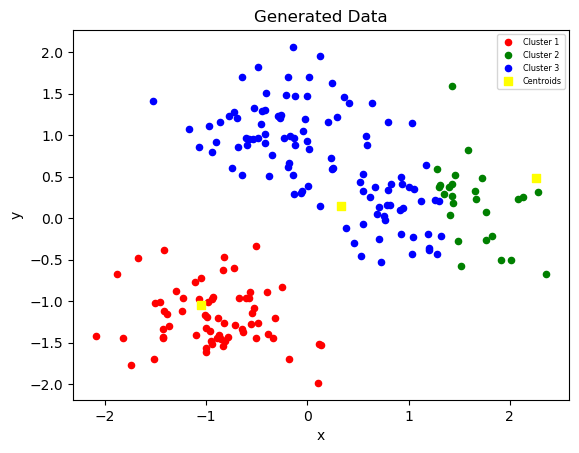

(3, 2)
[[-0.91941183 -1.18551732]
 [ 1.67765126  0.19561116]
 [ 0.1538114   0.69951094]]
[1 2 0 0 0 0 2 0 2 0 2 1 1 1 2 0 2 0 1 0 1 1 0 2 0 2 2 0 2 2 2 1 0 0 2 2 0
 2 0 2 2 2 0 1 0 1 1 0 2 2 0 2 0 2 2 2 0 1 2 2 0 2 0 0 0 0 2 2 0 2 2 0 2 2
 2 1 2 2 1 2 2 1 0 0 0 0 0 2 1 0 1 2 2 2 1 0 2 1 1 2 0 0 2 0 2 1 0 1 1 0 1
 1 2 0 2 0 0 2 2 2 0 1 2 0 0 1 2 2 2 2 1 0 2 0 0 1 1 1 2 1 2 2 0 2 1 2 2 0
 0 1 2 0 1 0 1 0 0 2 1 1 2 1 1 0 2 1 1 2 0 1 0 2 2 0 2 1 2 2 2 2 2 2 0 0 0
 2 1 1 1 2 2 2 0 0 2 0 2 2 2 2]


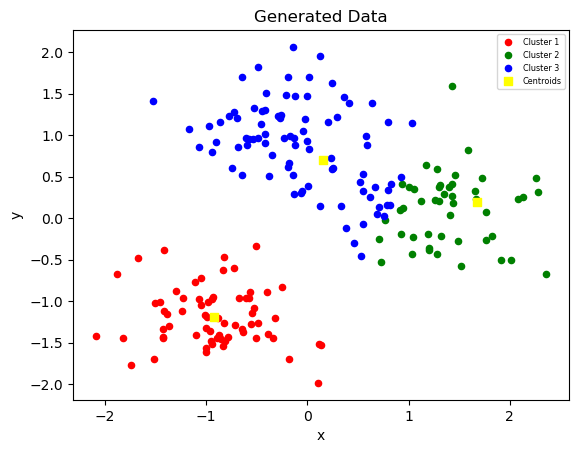

(3, 2)
[[-0.91941183 -1.18551732]
 [ 1.41273728  0.09919731]
 [-0.05579139  0.86938822]]
[1 2 0 0 0 0 2 0 1 0 1 1 1 1 2 0 2 0 1 0 1 1 0 2 0 2 2 0 2 1 1 1 0 0 2 2 0
 2 0 2 1 2 0 1 0 1 1 0 1 2 0 2 0 2 2 2 0 1 2 2 0 2 0 0 0 0 2 2 0 2 2 0 2 1
 2 1 1 2 1 2 2 1 0 0 0 0 0 2 1 0 1 2 2 2 1 0 2 1 1 2 0 0 2 0 2 1 0 1 1 0 1
 1 2 0 2 0 0 2 2 2 0 1 2 0 0 1 2 2 1 2 1 0 2 0 0 1 1 1 2 1 2 2 0 2 1 2 1 0
 0 1 2 0 1 0 1 0 0 2 1 1 2 1 1 0 2 1 1 2 0 1 0 2 1 0 2 1 2 2 2 2 2 1 0 0 0
 2 1 1 1 2 2 1 0 0 2 0 2 2 1 1]


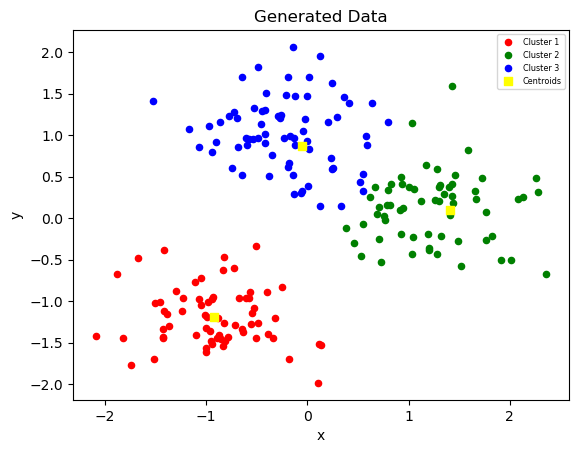

(3, 2)
[[-0.91941183 -1.18551732]
 [ 1.24095637  0.11700776]
 [-0.21603806  1.01655182]]
[1 2 0 0 0 0 2 0 1 0 1 1 1 1 2 0 2 0 1 0 1 1 0 2 0 2 2 0 2 1 1 1 0 0 2 2 0
 2 0 2 1 2 0 1 0 1 1 0 1 2 0 2 0 2 2 2 0 1 2 1 0 2 0 0 0 0 2 2 0 2 2 0 2 1
 1 1 1 2 1 2 2 1 0 0 0 0 0 2 1 0 1 2 2 2 1 0 2 1 1 2 0 0 2 0 2 1 0 1 1 0 1
 1 2 0 2 0 0 2 2 2 0 1 2 0 0 1 2 2 1 2 1 0 2 0 0 1 1 1 2 1 2 2 0 1 1 2 1 0
 0 1 2 0 1 0 1 0 0 2 1 1 2 1 1 0 2 1 1 2 0 1 0 2 1 0 2 1 2 2 2 1 2 1 0 0 0
 2 1 1 1 2 2 1 0 0 2 0 2 2 1 1]


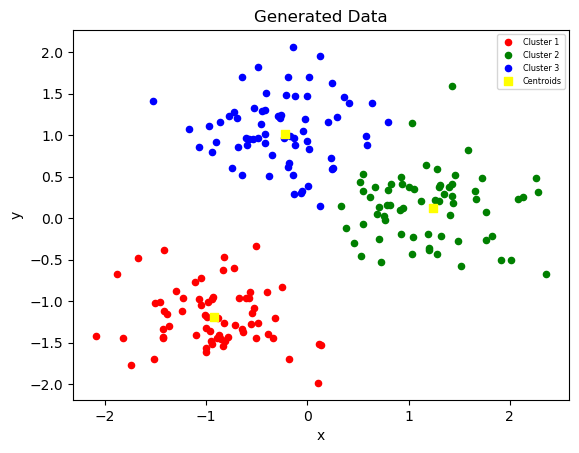

(3, 2)
[[-0.91941183 -1.18551732]
 [ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]]
[1 2 0 0 0 0 2 0 1 0 1 1 1 1 2 0 2 0 1 0 1 1 0 2 0 2 2 0 2 1 1 1 0 0 2 2 0
 2 0 2 1 2 0 1 0 1 1 0 1 2 0 2 0 2 2 2 0 1 2 1 0 2 0 0 0 0 2 2 0 2 2 0 2 1
 1 1 1 2 1 2 2 1 0 0 0 0 0 2 1 0 1 2 2 2 1 0 2 1 1 2 0 0 2 0 2 1 0 1 1 0 1
 1 2 0 2 0 0 2 2 2 0 1 2 0 0 1 2 2 1 2 1 0 2 0 0 1 1 1 2 1 2 2 0 1 1 2 1 0
 0 1 2 0 1 0 1 0 0 2 1 1 2 1 1 0 2 1 1 2 0 1 0 2 1 0 2 1 2 2 2 1 2 1 0 0 0
 2 1 1 1 2 2 1 0 0 2 0 2 2 1 1]


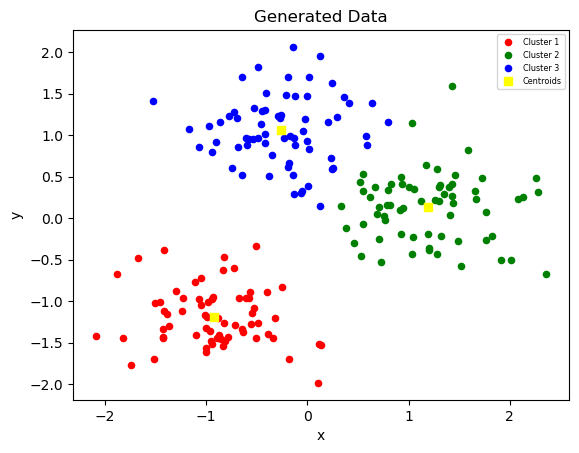

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

X = get_sample_blobs_data()

n_clusters = 3

mykmeans = MyKMeans(
    init = "k-means++",   # another option is "random"
    # init = "random",
    n_clusters = n_clusters,
    n_init = "auto",
    max_iter = 100,
    random_state = 42
)

mykmeans.initialize(X)

n_iter = 5

for i in range(n_iter):
  print(mykmeans.cluster_centers_.shape)
  print(mykmeans.cluster_centers_)
  print(mykmeans.labels_)

  plot_clusters(n_clusters, mykmeans.cluster_centers_, X, mykmeans.labels_,
                title = "Generated Data",
                x_label = "x",
                y_label = "y",
                colors = default_colors)

  mykmeans.recompute_centroids(X)

  plt.show()

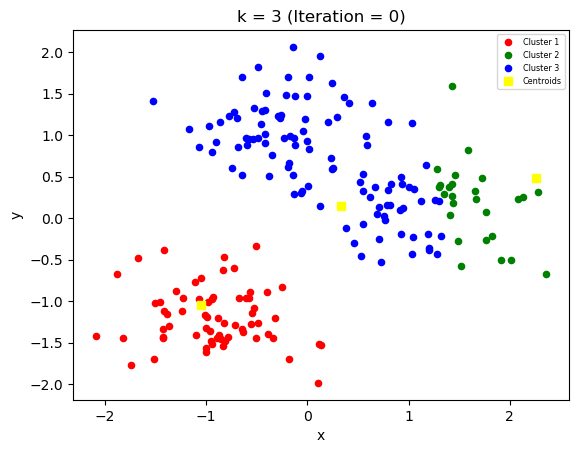

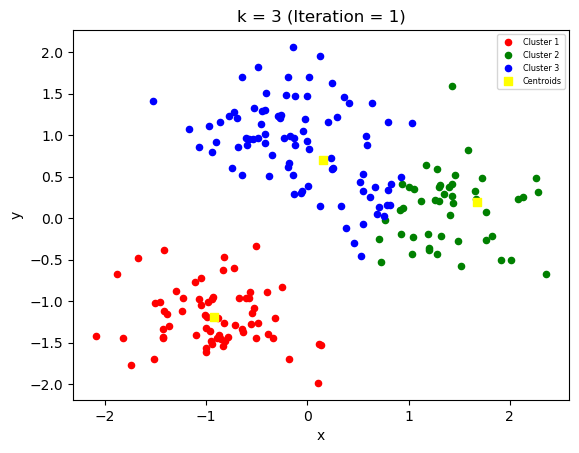

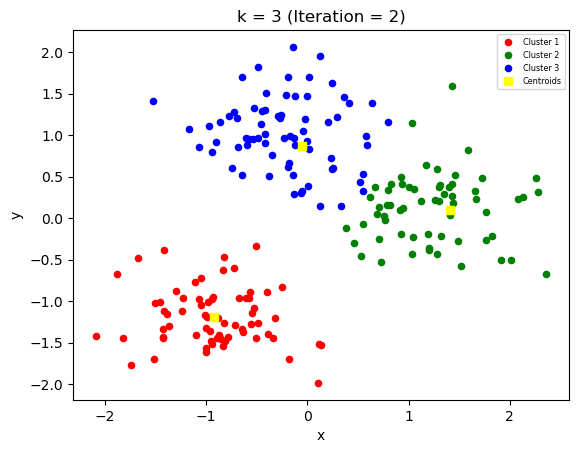

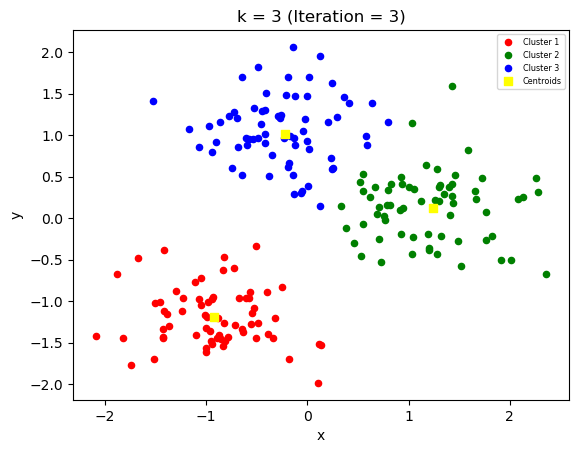

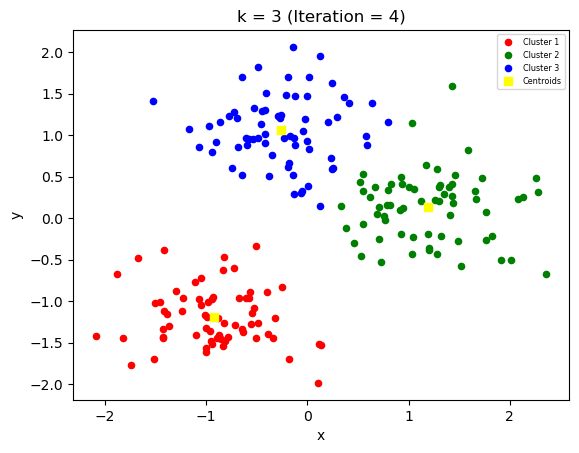

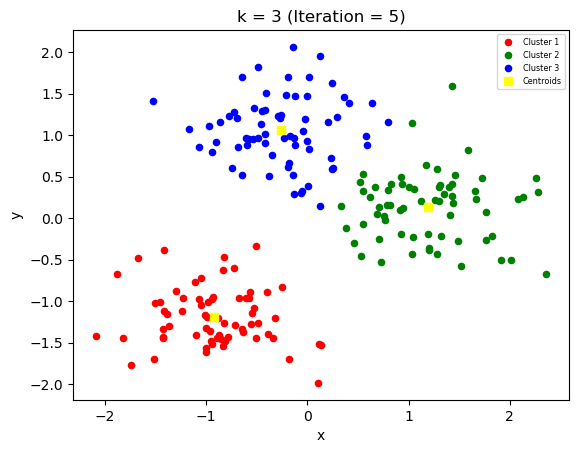

Iteration = 5
74.57960106819854
[[-0.91941183 -1.18551732]
 [ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]]
5
[1 2 0 0 0 0 2 0 1 0 1 1 1 1 2 0 2 0 1 0 1 1 0 2 0 2 2 0 2 1 1 1 0 0 2 2 0
 2 0 2 1 2 0 1 0 1 1 0 1 2 0 2 0 2 2 2 0 1 2 1 0 2 0 0 0 0 2 2 0 2 2 0 2 1
 1 1 1 2 1 2 2 1 0 0 0 0 0 2 1 0 1 2 2 2 1 0 2 1 1 2 0 0 2 0 2 1 0 1 1 0 1
 1 2 0 2 0 0 2 2 2 0 1 2 0 0 1 2 2 1 2 1 0 2 0 0 1 1 1 2 1 2 2 0 1 1 2 1 0
 0 1 2 0 1 0 1 0 0 2 1 1 2 1 1 0 2 1 1 2 0 1 0 2 1 0 2 1 2 2 2 1 2 1 0 0 0
 2 1 1 1 2 2 1 0 0 2 0 2 2 1 1]


In [54]:
n_clusters = 3

mykmeans = MyKMeans(
    init = "k-means++",   # another option is "random"
    # init = "random",
    n_clusters = n_clusters,
    n_init = "auto",
    max_iter = 100,
    random_state = 42
)

mykmeans.fit(X, visualize = True)
print("Iteration =", mykmeans.n_iter_)

print(mykmeans.inertia_)
print(mykmeans.cluster_centers_)
print(mykmeans.n_iter_)
print(mykmeans.labels_)

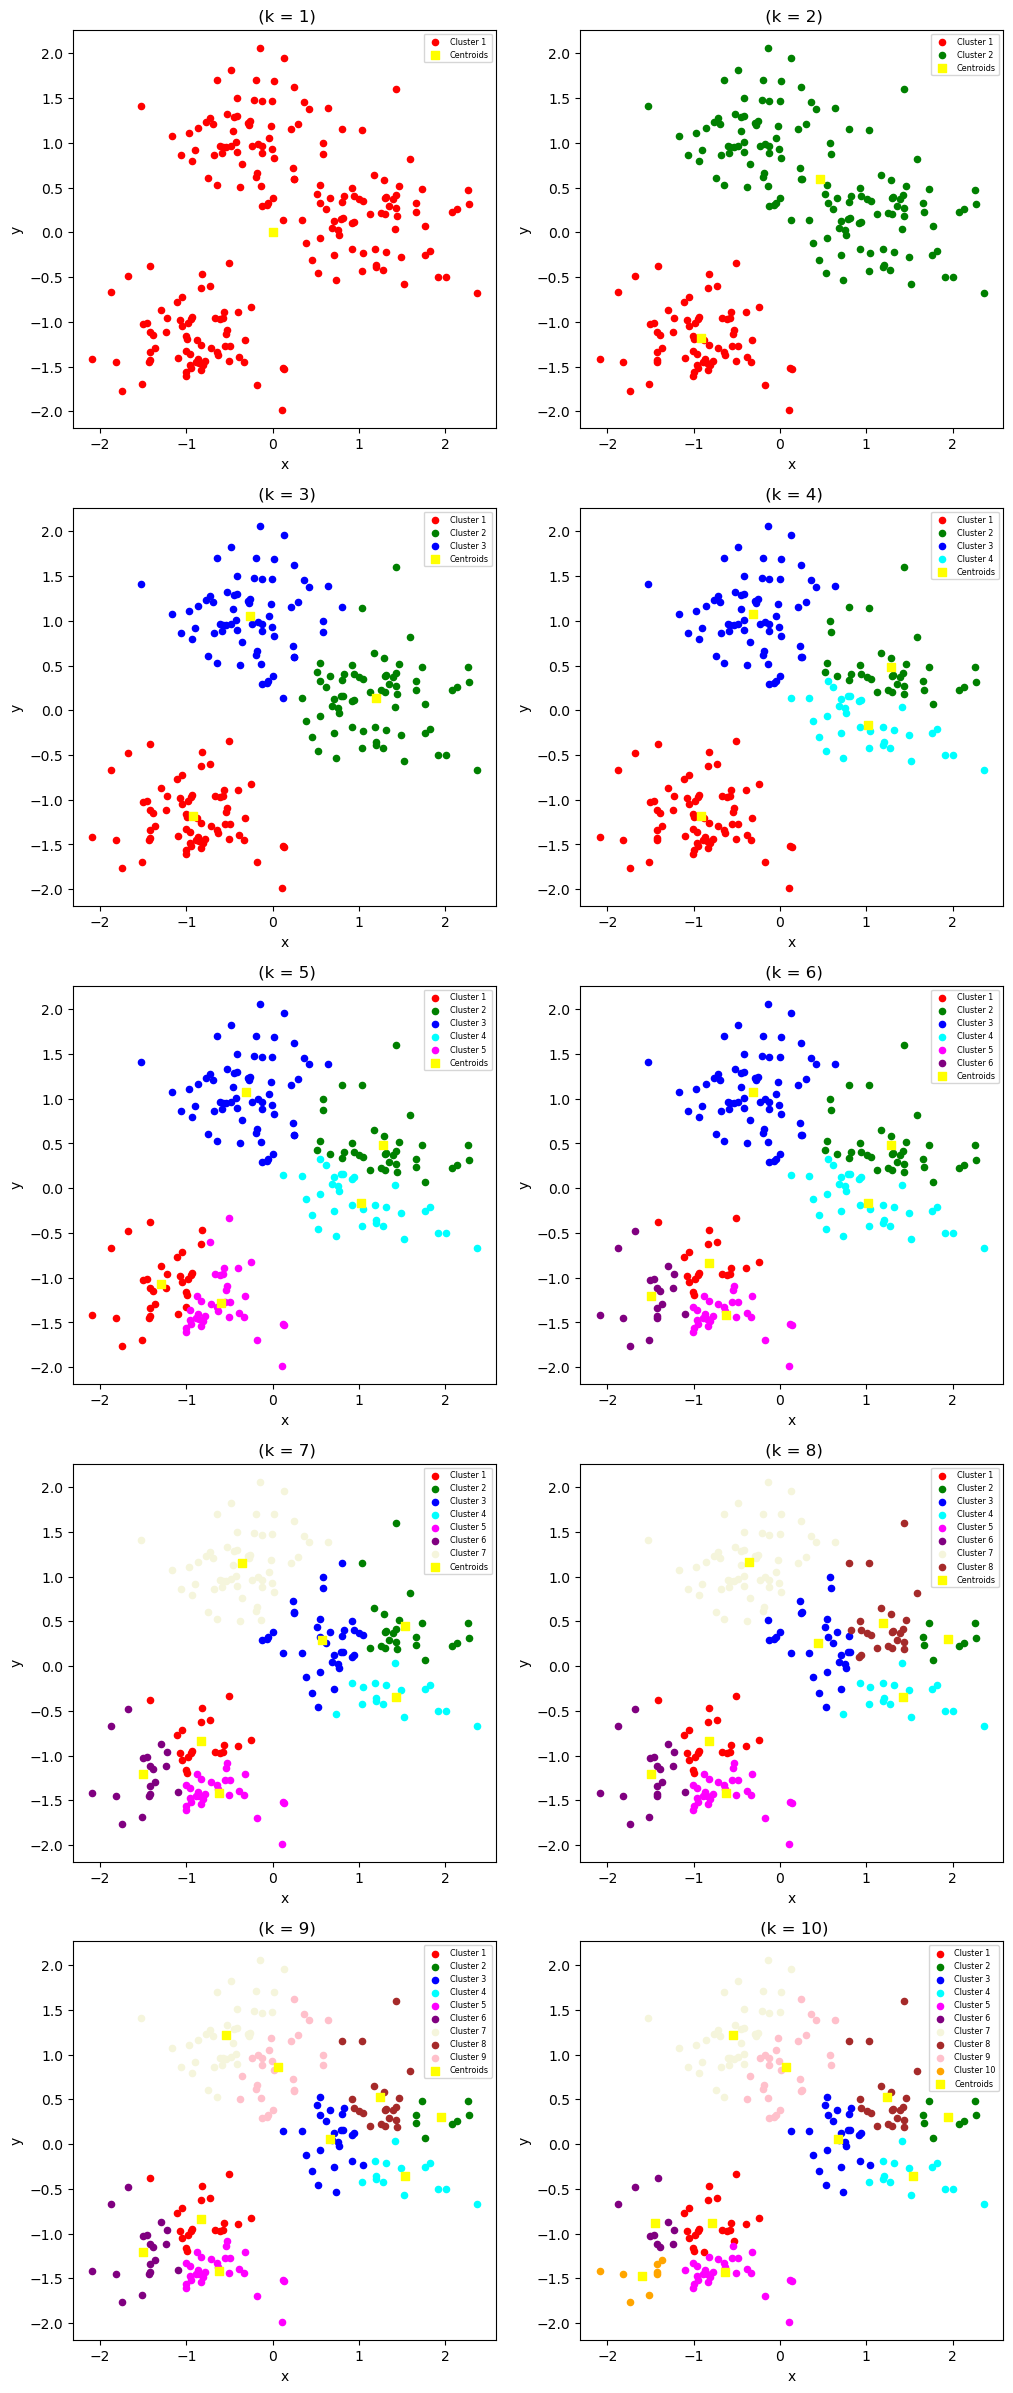

In [55]:
WCSS_array = get_inertia_list(X, k_min = 1, k_max = 10, KMeans_model = MyKMeans,
                              title = "",
                              x_label = "x",
                              y_label = "y",
                              visualize = True)

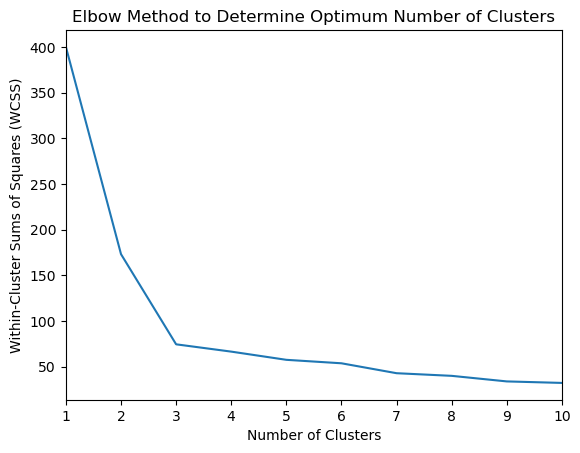

In [56]:
plot_inertia(WCSS_array, k_max = 10)
plt.show()

n_clusters = elbow = 3
Iteration = 5


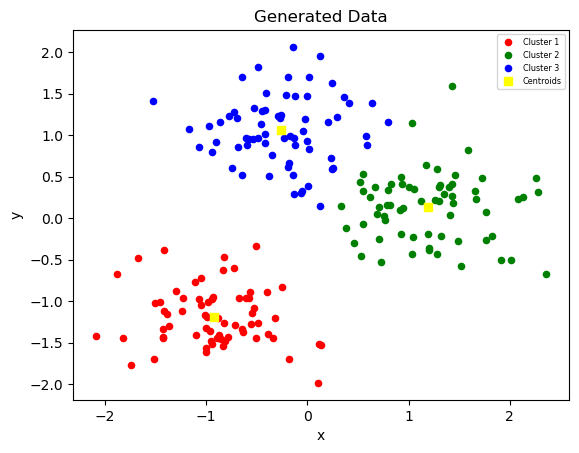

In [57]:
n_clusters = get_elbow(WCSS_array, k_max = 10)
print("n_clusters = elbow =", n_clusters)

mykmeans = MyKMeans(
    init = "k-means++",   # another option is "random"
    n_clusters = n_clusters,
    n_init = "auto",
    max_iter = 100,
    random_state = 42
)

mykmeans.fit(X)
labels = mykmeans.predict(X)
print("Iteration =", mykmeans.n_iter_)

plot_clusters(n_clusters, mykmeans.cluster_centers_, X, labels,
              title = "Generated Data",
              x_label = "x",
              y_label = "y",
              colors = default_colors)
plt.show()

### Test the Model

In [59]:
sample_test = np.array([[1, 0.5], [-1, -1.5]])
print(sample_test)
print(sample_test.shape)

labels = mykmeans.predict(sample_test)
print(labels)

[[ 1.   0.5]
 [-1.  -1.5]]
(2, 2)
[1 0]


## Test Our Own K-means Class Using Real-World Data

In [62]:
dataset = pd.read_csv('Mall_Customers.csv')

In [63]:
X = dataset.iloc[:, [3, 4]].values  # all rows, column 3 and 4
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(200, 2)


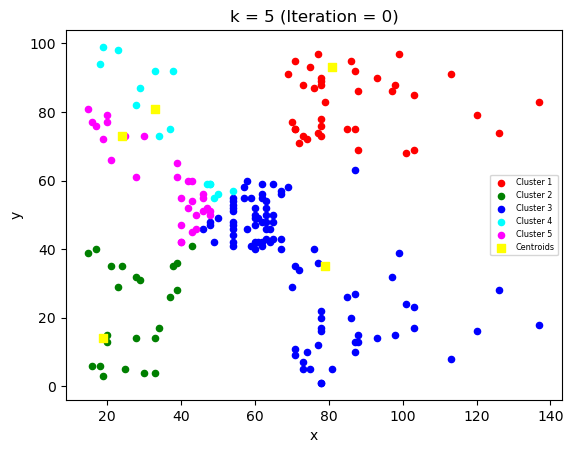

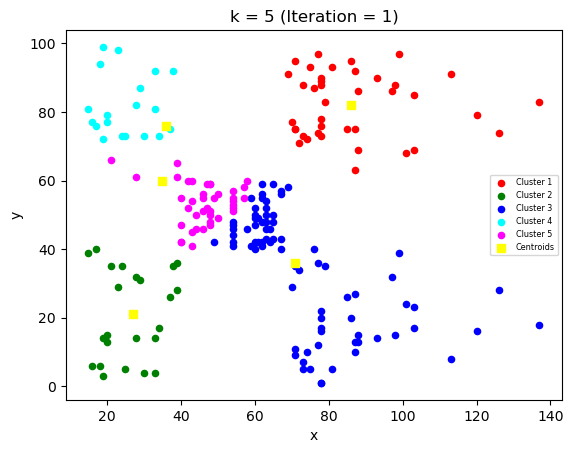

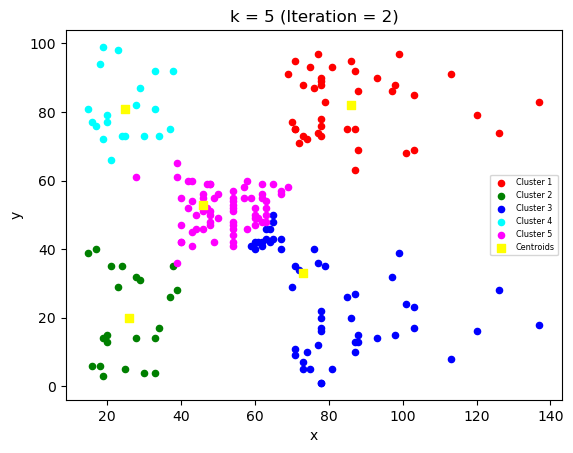

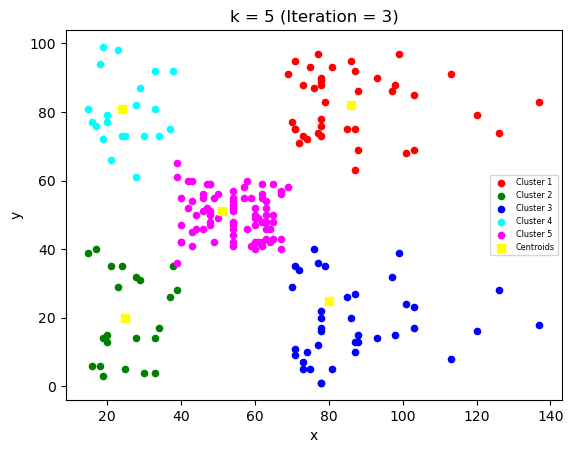

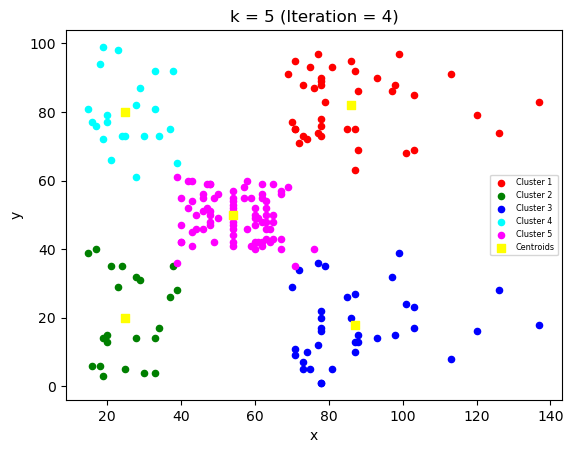

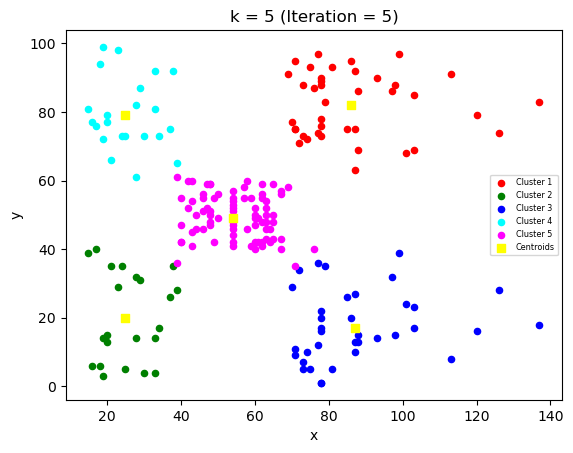

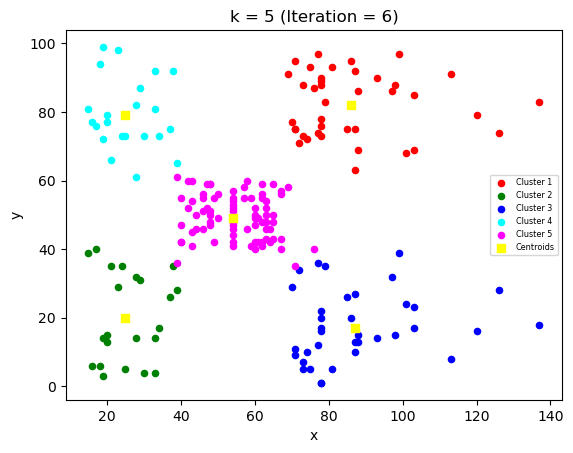

Iteration = 6
44649.0
[[86 82]
 [25 20]
 [87 17]
 [25 79]
 [54 49]]
6
[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 4 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 2 0 4 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 4 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [64]:
n_clusters = 5

mykmeans = MyKMeans(
    init = "k-means++",   # another option is "random"
    # init = "random",
    n_clusters = n_clusters,
    n_init = "auto",
    max_iter = 100,
    random_state = 42
)

mykmeans.fit(X, visualize = True)
print("Iteration =", mykmeans.n_iter_)

print(mykmeans.inertia_)
print(mykmeans.cluster_centers_)
print(mykmeans.n_iter_)
print(mykmeans.labels_)

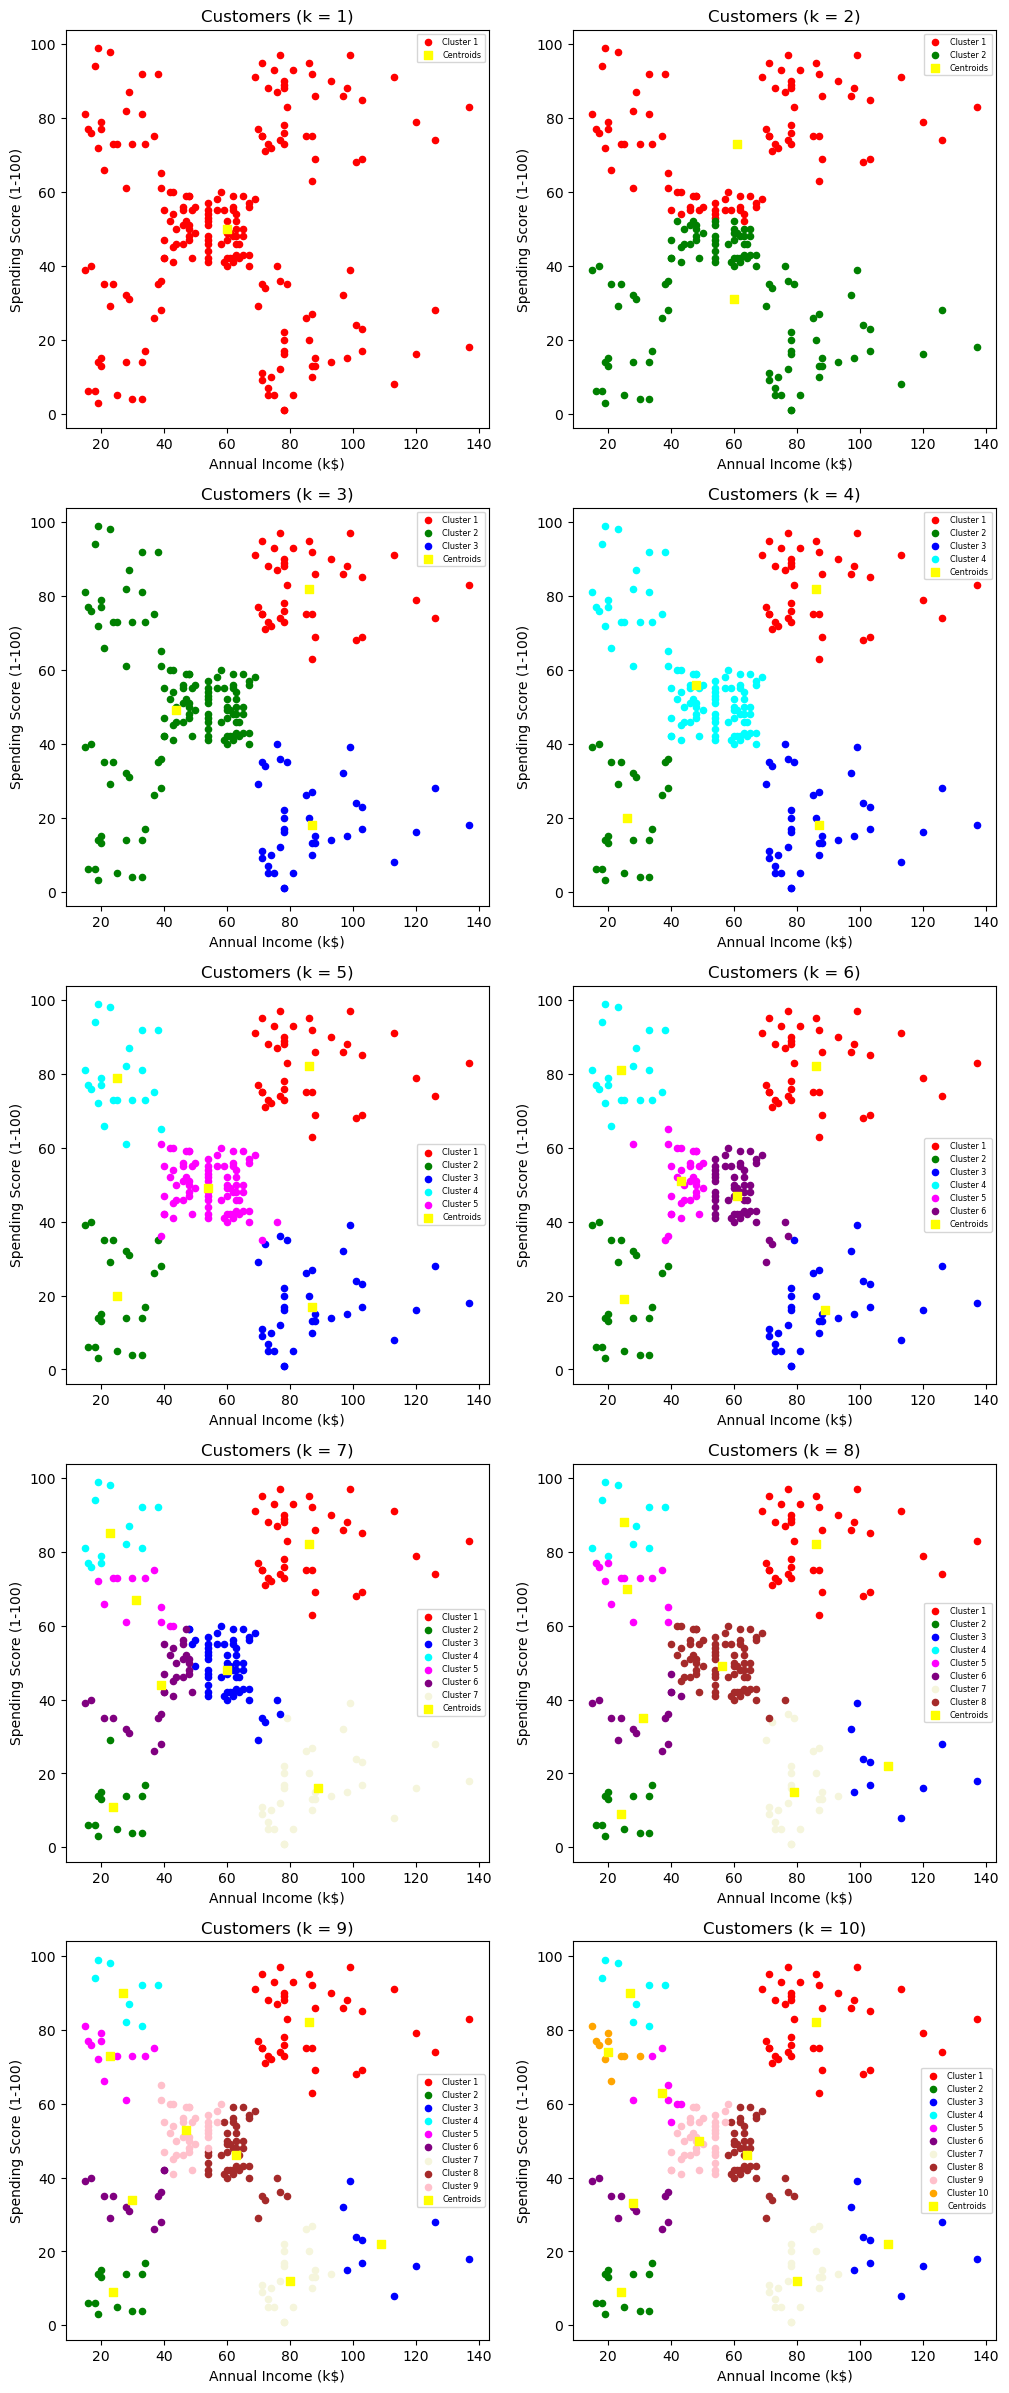

In [65]:
WCSS_array = get_inertia_list(X, k_min = 1, k_max = 10, KMeans_model = MyKMeans,
                              title = "Customers",
                              x_label = "Annual Income (k$)",
                              y_label = "Spending Score (1-100)",
                              visualize = True)

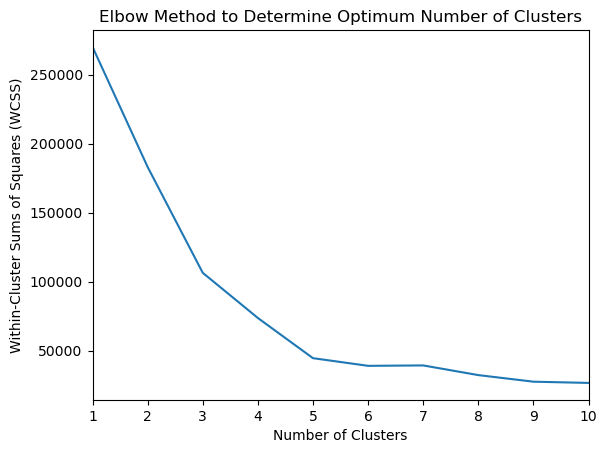

In [66]:
plot_inertia(WCSS_array, k_max = 10)
plt.show()

n_clusters = elbow = 5


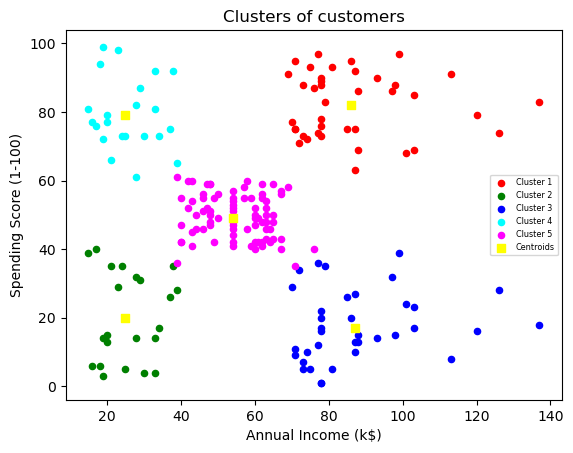

In [67]:
n_clusters = get_elbow(WCSS_array, k_max = 10)
print("n_clusters = elbow =", n_clusters)

mykmeans = MyKMeans(
    init = "k-means++",   # another option is "random"
    n_clusters = n_clusters,
    n_init = "auto",
    max_iter = 100,
    random_state = 42
)

mykmeans.fit(X)
labels = mykmeans.predict(X)

plot_clusters(n_clusters, mykmeans.cluster_centers_, X, labels,
              title = "Clusters of customers",
              x_label = "Annual Income (k$)",
              y_label = "Spending Score (1-100)",
              colors = default_colors)
plt.show()

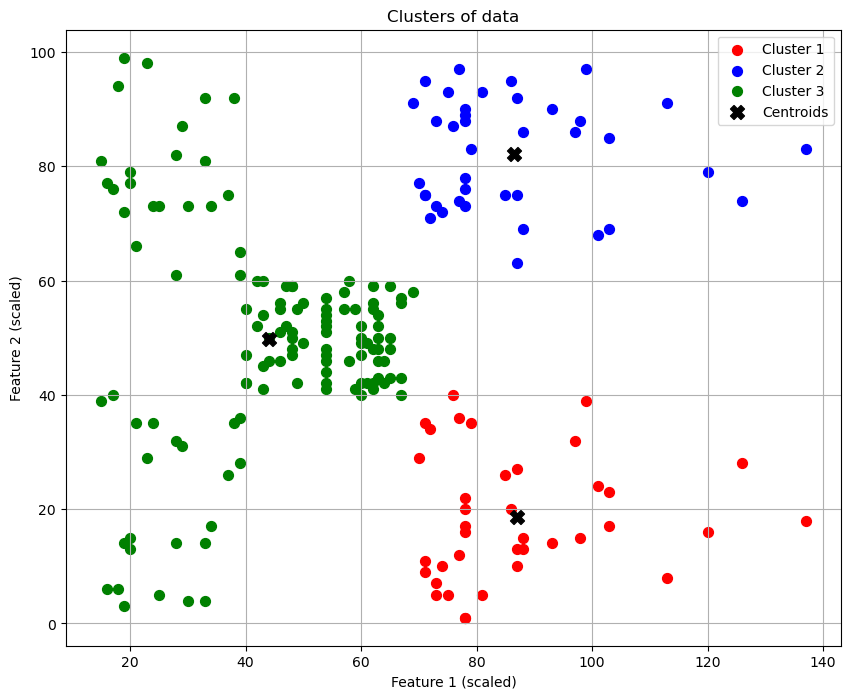

In [68]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'X' is your dataset already loaded and scaled if necessary

# Run K-Means
n_clusters = 3  # Replace with the optimal number of clusters determined via the Elbow Method or other means
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Generate the plot
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'orange']  # Add more colors if needed

for i in range(n_clusters):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids', marker='X')

plt.title('Clusters of data')
plt.xlabel('Feature 1 (scaled)')  # Adjust label as per your dataset features
plt.ylabel('Feature 2 (scaled)')  # Adjust label as per your dataset features
plt.legend()
plt.grid(True)
plt.show()


## Test the Model

In [70]:
sample_test = np.array([[70, 60], [100, 60]])
print(sample_test)
print(sample_test.shape)

labels = mykmeans.predict(sample_test)
print(labels)

[[ 70  60]
 [100  60]]
(2, 2)
[4 0]


## END.

## Some Related Experiments - Coding Strategies of Assigning Labels Based on Minimal Distance

In [73]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.cluster import KMeans

dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values  # all rows, column 3 and 4
print(X.shape)

n_clusters = 5

kmeans = KMeans(
    init="k-means++",   # another option is "random"
    n_clusters = n_clusters,
    n_init = "auto",
    max_iter = 100,
    random_state = 42
)

kmeans.fit(X)
centroids = kmeans.cluster_centers_

(200, 2)


#### Not-So-Efficient Way - Nested Loops Iterate Rows

- The algorithm is the easiest to understand.
- No `numpy` broadcasting used.
- No `argmin` function used.

In [75]:
def assign_labels_nested_loops_iterate_rows(X, centroids):
  # print(X.shape)
  # print(centroids.shape)

  m = X.shape[0]
  n = X.shape[1]
  n_clusters = centroids.shape[0]

  C = np.zeros(m, dtype = int)

  for row in range(m):

    point = X[row, :]

    for k in range(n_clusters):

      centroid = centroids[k, :]

      # dist = np.sum( (point - centroid)**2 )  # slower
      dist = 0
      for j in range(n):
        dist += (point[j] - centroid[j])**2

      if (k == 0):
        dist_smallest = dist
        dist_smallest_index = 0
      else:
        if (dist < dist_smallest):
          dist_smallest = dist
          dist_smallest_index = k

    C[row] = dist_smallest_index + 1

  return C

C = assign_labels_nested_loops_iterate_rows(X, centroids)
print(C.shape)
print(C)

(200,)
[5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5
 3 5 3 5 3 5 1 5 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


### Not-So-Efficient Way - Nested Loops Iterate Centroids

- `argmin` function used once.

In [77]:
def assign_labels_nested_loops_iterate_centroids(X, centroids):
  # print(X.shape)
  # print(centroids.shape)

  n_points = X.shape[0]
  n_clusters = centroids.shape[0]

  dists = np.zeros( (n_points, n_clusters) )

  for k in range(n_clusters):

    centroid = centroids[k, :]

    for row in range(n_points):

      point = X[row, :]

      dist = 0
      for j in range(X.shape[1]):
        dist += (point[j] - centroid[j])**2

      dists[row, k] = dist

  # print(dists.shape)
  # print(dists)

  C = np.argmin(dists, axis = 1) + 1

  return C

C = assign_labels_nested_loops_iterate_centroids(X, centroids)
print(C.shape)
print(C)

(200,)
[5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5
 3 5 3 5 3 5 1 5 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


### Not-So-Efficient Way - One Loop Iterate Rows

- `argmin` function used `m` times.
- Slowest.

In [80]:
def assign_labels_one_loop_iterate_rows(X, centroids):
  # print(X.shape)
  # print(centroids.shape)

  n_points = X.shape[0]
  C = np.zeros(n_points, dtype = int)

  for row in range(n_points):

    point = X[row, :]

    dists = np.sum( (point - centroids)**2, axis = 1 )   # broadcast used
    C[row] = np.argmin(dists) + 1

  return C

C = assign_labels_one_loop_iterate_rows(X, centroids)
print(C.shape)
print(C)

(200,)
[5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5
 3 5 3 5 3 5 1 5 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


### Most Efficient Way - One Loop Iterate Centroids

- `argmin` function used once.
- Fastest as it is most Pythonic way.

In [82]:
def assign_labels_one_loop_iterate_centroids(X, centroids):
  # print(X.shape)
  # print(centroids.shape)

  n_points = X.shape[0]
  n_clusters = centroids.shape[0]

  dists = np.zeros( (n_points, n_clusters) )

  for k in range(n_clusters):

    centroid = centroids[k, :]

    # dist = np.sum( (X - centroid)**2, axis = 1 )   # slower
    # dists = np.c_[dists, dist]
    dists[:, k] = np.sum( (X - centroid)**2, axis = 1 )

  # print(dists.shape)
  # print(dists)

  C = np.argmin(dists, axis = 1) + 1

  return C

C = assign_labels_one_loop_iterate_centroids(X, centroids)
print(C.shape)
print(C)

(200,)
[5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5
 3 5 3 5 3 5 1 5 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


### Performance of Coding Methods

Output()

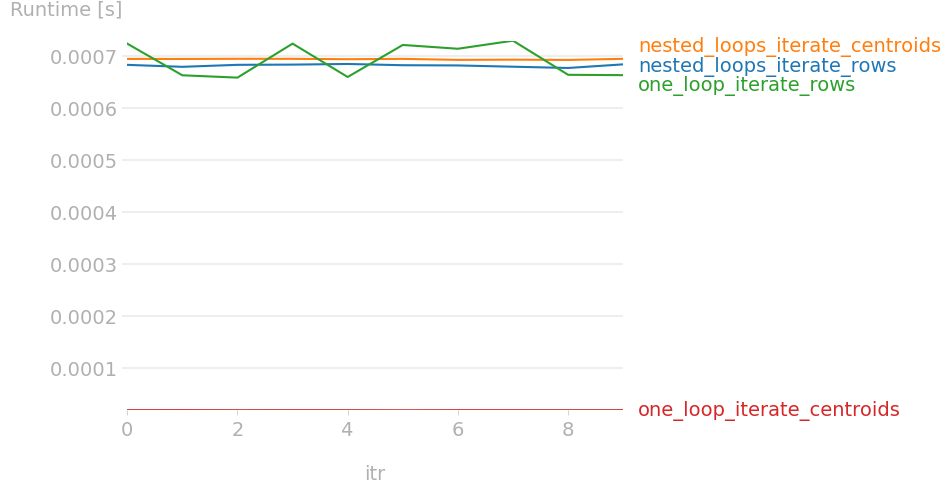

In [85]:
# Source: https://stackoverflow.com/questions/37743843/python-why-use-numpy-r-instead-of-concatenate
!pip install perfplot

import numpy as np
import perfplot

b = perfplot.bench(
    setup = lambda n: (X, centroids),
    kernels = [
        assign_labels_nested_loops_iterate_rows,
        assign_labels_nested_loops_iterate_centroids,
        assign_labels_one_loop_iterate_rows,
        assign_labels_one_loop_iterate_centroids
    ],
    labels = ["nested_loops_iterate_rows",
              "nested_loops_iterate_centroids",
              "one_loop_iterate_rows",
              "one_loop_iterate_centroids"
              ],
    n_range = range(10),
    xlabel = "itr",
)
b.save("out.png")
b.show()

### Tips: Randomly select a number with probability proportion to the number

In [92]:
np.random.seed(0)

def random_select(nums):
  probs = nums / np.sum(nums)
  cummulative_probs = np.cumsum(probs)
  rand = rd.random()
  i = 0
  for j, prob in enumerate(cummulative_probs):
    if prob >= rand:
      i = j
      break
  return i, nums[i]

nums = [10, 20, 5, 40, 25]

counts = np.zeros(len(nums))

round = 10000
for i in range(round):
  index, num = random_select(nums)
  counts[index] += 1

for i in range(len(nums)):
  print(counts[i] / np.sum(counts))

0.097
0.202
0.0458
0.4115
0.2437


### Tips: Append arrays of shape (1, 2) to an empty array

In [94]:
import numpy as np

array1 = np.empty((0, 2))   # start with empty array

array2 = np.array([[1, 2]])
array3 = np.array([[3, 4]])
array4 = np.array([[5, 6]])

array1 = np.append(array1, array2, axis = 0)
array1 = np.append(array1, array3, axis = 0)
array1 = np.append(array1, array4, axis = 0)

print(array1, array1.shape)

[[1. 2.]
 [3. 4.]
 [5. 6.]] (3, 2)


### Tips: Filter one array with another array

In [96]:
import numpy as np
Z = np.array([ [ 1,  2,  3],
               [ 4,  5,  6],
               [ 7,  8,  9],
               [10, 11, 12],
               [13, 14, 15] ])

labels = np.array([0, 1, 1, 0, 1])

print(labels == 0)
print(Z[labels == 0])
print(Z[labels == 0, 0])
print(Z[labels == 0, 1])

print(labels == 1)
print(Z[labels == 1])
print(Z[labels == 1, 0])
print(Z[labels == 1, 1])

[ True False False  True False]
[[ 1  2  3]
 [10 11 12]]
[ 1 10]
[ 2 11]
[False  True  True False  True]
[[ 4  5  6]
 [ 7  8  9]
 [13 14 15]]
[ 4  7 13]
[ 5  8 14]


### Tips: Class as a input to a function

In [98]:
class TestClass1:

  def __init__(self, data):
    self.data = data

  def test(self, data):
    self.data += data

  def show(self):
    print("data class TestClass1 =", self.data)

class TestClass2:

  def __init__(self, data):
    self.data = data

  def test(self, data):
    self.data -= data

  def show(self):
    print("data class TestClass2 =", self.data)

def test_fun(MyTestClass):
  c = MyTestClass(456)
  c.test(321)
  c.show()

test_fun(TestClass1)

test_fun(TestClass2)

data class TestClass1 = 777
data class TestClass2 = 135


### Tips: Choose a number x from list X but not in list Y

This is used in `MyKMeans.__init_centroids_kmeanspp()` function

In [101]:
X = [2, 5, 27, 13, 86, 18, 22, 43]
Y = [2, 13, 18]

for x in [x for x in X if x not in Y]:
  print(x)

5
27
86
22
43
